# Chapter 3. 특징생성
# 3.1 이 장의 구성
- 캐글 대회에서 모델의 성능을 높이는 가장 중요한 요소인 특징(feature)을 만드는 방법에 대해 알아봅시다.

* feature 는 성능을 높이는 가장 중요한 요소
* 대회마다 유효한 특징은 서로 다름 -> 다양한 특징을 만들어보고 확인해보는 것이 중요함

- 3.2 모델과 특징의 관계
- 3.3 ~ 3.7 변수를 변환해 특징을 만드는 여러 가지 방법 
    - 결측값을 처리, 수치형/범주형 변수 변환, 단일 정보 변환(날짜 시각에서 정보 추출), 변수 조합으로 특징 생성
    - 데이터셋 결합, 집약하여 통계량(평균값, 분산) 계산한 뒤 결합하여 특징 생성
    - 과거 시점에서의 값을 특징으로 만드는 lag 특징(시차 특징)
- 3.11 차원축소와 비지도학습에 따라 데이터셋에서 각 행 데이터의 특징 추출
- 3.12 기타 테크닉.
- 3.13 실제 경진 대회의 적절한 사례

# 3.2 모델과 특징
* 모델과 특징의 관계
* 베이스라인 모델에 사용하는 특징
## 3.2.1 모델과 특징의 관계
* 어떤 모델의 입력값으로써 해당 특징을 사용할 건가요?
- 특징을 만들 떄는 **어떤 모델**의 입력값으로써 해당 특징을 사용할 것인지 미리 알아두면 좋습니다. 



---
---

#### Gradient Boosting Algorithm
- 회귀분석 또는 분류분석을 수행할 수 있는 예측모형
- 예측모형의 앙상블 방법론 중 부스팅 계열에 속하는 알고리즘.
- Gradient Boosting Algorithm 은 Tabular format데이터(엑셀형태와 같이 X-Y Grid)에 대한 예측에서 성능이 좋음.
- 때문에 Gradient Boosting Algorithm을 구현한 패키지들이 많음-> LightGBM, CatBoost, XGBoost 
- GBM은 계산량이 상당히 많이 필요하기 때문에 이를 하드웨어 효율적으로 구현하는 것을 필요로 하는데, 위 패키지들은 모두 GBM을 효율적으로 구현하려 하는 패키지들이라 할 수 있음.
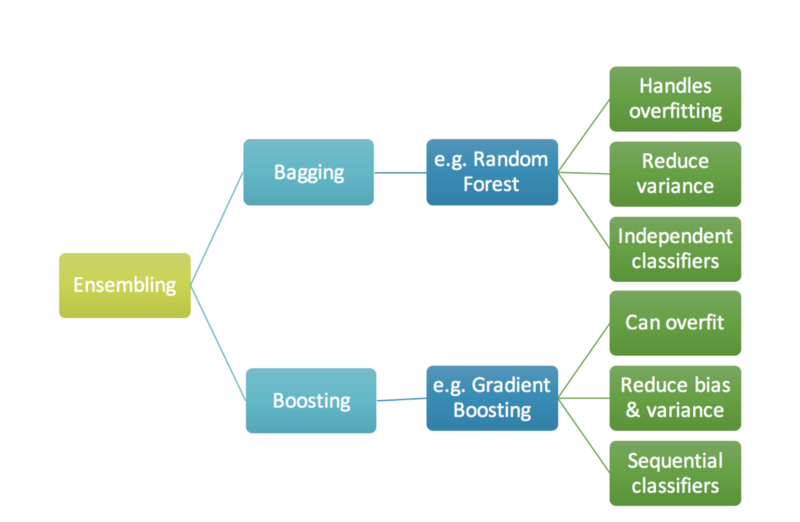

#### Boosting이란?
- 주요 앙상블 알고리즘은 bagging과 boosting으로 나눌 수 있고, Gradient boosting은 boosting계열의 앙상블 알고리즘임.
- boosting이란 약한 분류기를 결합하여 강한 분류기를 만드는 과정.
- 예를 들어, 분류기 A, B, C 가 있고, 각각 0.3 정도의 accuracy를 보여줄 때, A,B,C 를 결합하여 더 높은 정확도 예를 들어 0.7 정도의 accuracy를 얻는게 앙상블 알고리즘임. 
- boosting은 이 과정을 순차적으로 실행하는데, A 분류기를 만든 후, 그 정보를 바탕으로 B 분류기를 만들고, 다시 그 정보를 바탕으로 C 분류기를 만듭니다. 그리고 최종적으로 만들어진 분류기들을 모두 결합하여 최종 모델을 만드는 것이 Boosting의 원리입니다. 
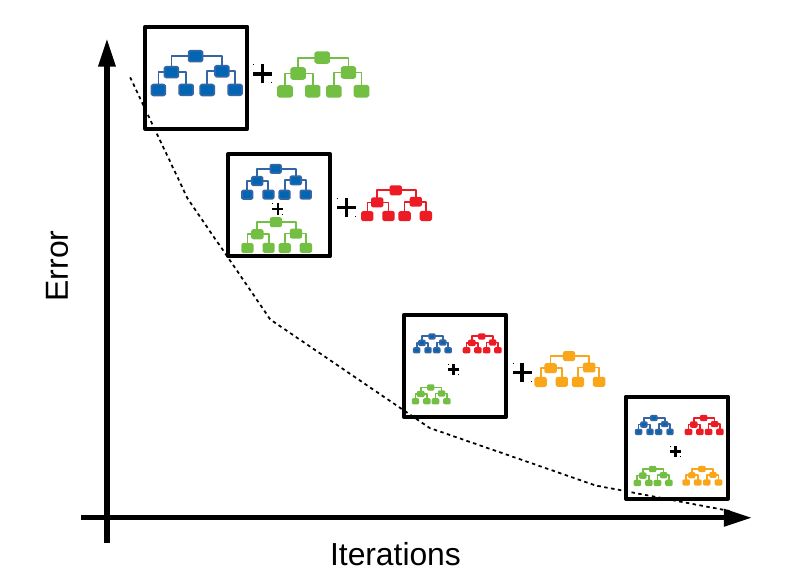
---

#### GBM의 직관적 이해
- Residual fitting. 
- 간단한 모델 A를 통해 y를 예측하고 남은 잔차(residual)을 다시 B라는 모델을 통해 예측하고, A+B라는 모델을 통해 y를 예측한다면 A보다 나은 B모델을 만들 수 있게 됩니다. 이러한 방법을 계속하면 잔차는 계속 줄어들게 되고, training set을 잘 설명하는 예측모델을 만들 수 있게 됩니다. 
- 하지만 이러한 방식은 bias는 상당히 줄일 수 있어도, 과적합이 일어날 수 있다는 단점이 있습니다. 


[Gradient Boosting Algorithm](https://3months.tistory.com/368)

#### GBDT
- 최초 분류기에서 음경사도(Negative Gradient)기반 모델 생성 후 잔차를 구함. 그리고 그 잔차를 예측하는 새로운 모델으 만듦. 이를 반복 결합하여 최종 모델을 계산함. 
- 언뜻보면 경사하강법과 비슷해보임. 두 알고리즘 모두 매번 반복할 때마다 손실함수를 미분해서 음의 경사도를 구한 다음 모델을 갱신함. 다만 경사하강법은 경사를 하강할 때마다 파라미터를 업데이트하고, GBDT는 잔차를 예측하는 새로운 모델을 추가하는 데 사용한다. 

---
---


예를들어, 정형데이터를 다루는 경진대회의 대표적 모델 중 하나인 **그레디언트 부스팅 의사결정 트리, gradient boosting decision tree(GBDT)** 의 특징은 다음과 같습니다.

* 수치의 크기(범위) 자체에는 의미가 없고, 크고 작은 관계에만 영향이 있습니다. -> 수치의 대소 관계가 바뀌지 않는 변환은 결과에 영향을 미치지 않음
* 결측값이 있어도 그대로 처리할 수 있습니다. -> 결측값을 반드시 채울 필요가 없음
* 결정 트리의 내부 반복 작업에 따라 변수 간 상호작용을 반영합니다. -> 변수 간 상호작용을 명시적으로 반영하지 않아도 자동으로 반영함. 예를 들어, 범주형 변수에서는 원-핫 인코딩 변환이 아닌 레이블 인코딩으로 변환해도 분기의 반복에 의해 각 변수가 가지는 정보를 어느 정도 반영하게 됩니다. 즉 변수의 범위나 분포를 크게 신경쓰지 않아도 됩니다. 

따라서 GBDT는 결측값과 범주형 변수를 다루기 쉽다는 장점이 있습니다. 

한편, 신경망의 특징은 다음과 같습니다. 
* 값의 범위에 영향을 받습니다. -> 수치의 스케일링(정수의 곱셈, 덧셈등의 연산에 의해 계산된 값의 범위를 조정하는 작업)은 성능에 영향을 미침
* 결측값을 채워야 합니다. 
* 앞 층의 출력을 결합하여 계산하는 연산으로 변수 간 상호작용을 반영합니다. -> 레이블 인코딩에서 변환한 값 그대로 연산에 쓰이므로, 범주형 변수의 변환은 레이블 인코딩보다는 원-핫 인코딩이 좋습니다. 

---

- 특징은 모델의 입력으로 사용할 수도 있고, 평균 등의 통계량을 구해 새로운 특징으로 만들 수도 있습니다. 

## 3.2.2 베이스라인이 되는 특징
* 예를들어, 사용자별로 행이 있고 특징과 목적변수의 열이 있는 데이터셋을 가정해봅시다.

* GBDT 모델의 경우엔, 사용자 ID 열을 삭제하고, 간단히 범주형 변수의 레이블 인코딩을 수행하기만 해도 베이스라인이 되는 특징을 생성할 수 있습니다. 
* 이처럼 간단한 데이터처리를 통해 만들어진 특징으로 의미있는 예측을 할 수 있으며, 베이스라인이 될 수 있습니다. 

* 신경망이나 선형 모델에서는 범주형 변수를 원-핫 인코딩 변환하고 결측값을 채워서 일단 학습시킬 수 있습니다. 
* 추가로 표준화 (standardization)데이터 처리를 하면 성능을 개선할 수 있습니다. 
 -표준화란 평균이 0이고 분산이 1이 되도록 값을 변환해주는 것입니다. 사이킷런에서는 sklearn.preprocessing.StandardScaler를 이용해 표준화할 수 있습니다. 
* 다만 이러한 모델들은 GBDT 모델만큼 점수가 나오지 않는 경우가 많아, 성능향상을 목적으로 다양한 연구를 통해 특징을 만들어가야 합니다. ??

## 3.2.3 결정 트리의 사고방식으로 생각하기 
| '결정 트리의 사고방식으로 생각하기' <-어떤 특징이 유효할지에 관한 캐글러의 사고방식

- GBDT의 머신러닝 모델은, 충분한 데이터가 있을 때 적절한 정보를 포함하는 데이터를 입력하면 변수 간 상호작용이나 비선형 관계성도 정확히 반영해 예측합니다. 결정 트리의 분기를 조합하여 상호작용이나 비선형의 관계성을 표현할 수 있기 때문입니다. 
- 그러나 기본적으로는 존재하지 않는 정보를 입력 정보로 반영할 수 없기에, 상호작용을 직접 표현한 특징이 있다면 이를 반영하는 편이 좋을 것 입니다. 

- 특징을 생성하는 작업은 '모델에 현재 주어진 정보를 활용하여 (입력으로 읽어낼 수 없거나, 읽기 어려운) 추가정보를 제공하는 것입니다. 

- 예1) 다른 데이터셋에 사용자 속성 정보가 있을 경우, 해당 데이터의 정보를 추가해야 모델에 반영됨
- 예2) 사용자 행동에 크게 영향을 주는 요소가 평균 단가(판매금액/판매개수)라고 가정하자. 이때 데이터셋에 판매 금액과 판매 개수의 특징만 들어가 있다면, GBDT는 판매 금액과 판매 개수의 상호작용으로써 평균 단가를 어느 정도까지는 반영합니다. 다만 데이터셋에 평균 단가를 특징으로 추가하는 편이 더 정확하게 반영됨. 

요약: 
- GBDT는 데이터셋 사이의 상호작용을 스스로 어느정도는 catch해내어 반영하지만, 더 정확한 반영을 위해서는 특징을 생성해서 제공해야 함
포인트: 
- 각 모델의 성격을 파악하여 예측이 도움이 될 특징을 생성해야함. GBDT, 신경망, 선형모델 등 모델에 맞는 데이터 변환이 요구됨. 



In [1]:
#- 이해를 돕기위한 타이타닉 예제 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn') #- custom style sheet
sns.set(font_scale=2.5) #- seaborn의 font_scale 설정

import missingno as msno #- 결측치 시각화

import warnings #- ignore warnings
warnings.filterwarnings('ignore')

#- notebook 실행 브라우저에서 바로 그림보여주기
%matplotlib inline  

dir_path = os.getenv("HOME") + "/aiffel/Kaggle_Transcription_Study/Data/Titanic_tutorial/" 
df_train = pd.read_csv(dir_path +'train.csv')
df_test = pd.read_csv(dir_path +'test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#- 각 컬럼마다 null 값의 비율을 출력

for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value:{:.2f}'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value:0.00
column:   Survived	 Percent of NaN value:0.00
column:     Pclass	 Percent of NaN value:0.00
column:       Name	 Percent of NaN value:0.00
column:        Sex	 Percent of NaN value:0.00
column:        Age	 Percent of NaN value:19.87
column:      SibSp	 Percent of NaN value:0.00
column:      Parch	 Percent of NaN value:0.00
column:     Ticket	 Percent of NaN value:0.00
column:       Fare	 Percent of NaN value:0.00
column:      Cabin	 Percent of NaN value:77.10
column:   Embarked	 Percent of NaN value:0.22


In [3]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value:{:.2f}'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value:0.00
column:     Pclass	 Percent of NaN value:0.00
column:       Name	 Percent of NaN value:0.00
column:        Sex	 Percent of NaN value:0.00
column:        Age	 Percent of NaN value:20.57
column:      SibSp	 Percent of NaN value:0.00
column:      Parch	 Percent of NaN value:0.00
column:     Ticket	 Percent of NaN value:0.00
column:       Fare	 Percent of NaN value:0.24
column:      Cabin	 Percent of NaN value:78.23
column:   Embarked	 Percent of NaN value:0.00


<AxesSubplot:>

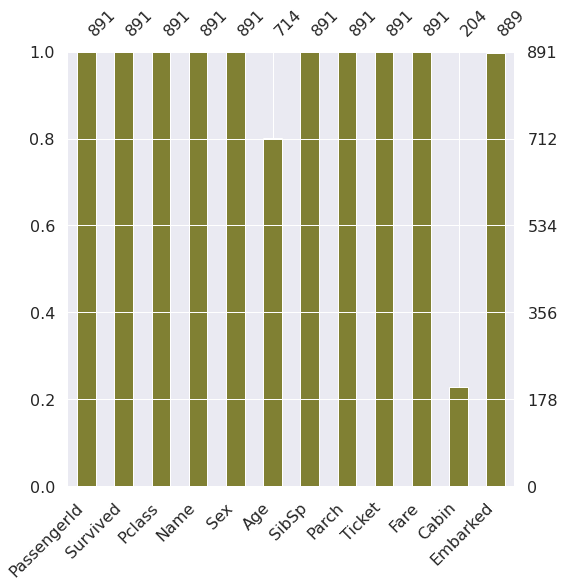

In [4]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.5, 0.5, 0.2))

<AxesSubplot:>

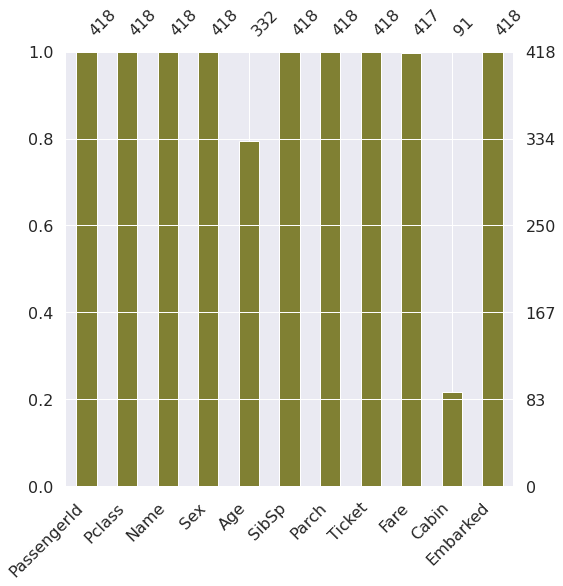

In [5]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.5, 0.5, 0.2))

- train, test set 에서 Age( 둘다 약 20%), Cabin(둘다 약 80%), embarked(train 만 0.22%)의 null data 가 존재합니다.

- 의사결정나무같은 알고리즘은 null 값을 처리할 수 있으나, 알고리즘에 따라 결측치를 알아서 처리하지 못하는 경우가 있습니다. 

- 따라서 모델링을 시작하기 전에 이 결측치들을 처리해주는 것이 중요합니다. 



## 3.3 결측값 처리
- 결측값이 만들어지는 이유 
 - 값이 존재하지 않는 경우 
 - 특정 의도가 있는 경우
 - 값을 얻는 데 실패한 경우

- 경진대회의 주류 알고리즘인 xgboost, lightgbm 같은 GBDT 라이브러리에서는 결측값을 그대로 사용할 수 있습니다. 따라서 GBDT를 사용할 때는 결측값을 그대로 사용하는 것이 기본 옵션입니다.

- 그러나 GBDT 이외의 많은 모델은 결측값이 포함된 학습 데이터를 다룰 수 없습니다. 결측값 그대로 학습을 진행하려 하면 에러가 발생하기 때문에, 결측값에 어떤 값이든 채워넣어야 합니다. 

- 결측값을 채우는 방법은 대표값으로 채우는 법/ 다른 변수로부터 예측하여 채우는 법이 있습니다. 

- 물론 GBDT 모델에서도 결측값을 채우는 편이 성능 향상에 도움일 될 때가 있습니다. (결측값 그대로 v. 결측값 채우고 학습의 경우를 비교분석해봐~)
- 또는 결측값을 이용해 새로운 특징을 만들어낼 수도 있습니다.

- 결측값을 포함하는 행 데이터나 변수를 제외하는 방법도 있지만, 경진대회에서는 주어진 데이터로부터 예측에 유효한 정보를 최대한 얻어야 하므로, 데이터를 제거하는 것은 좋은 방법이 아닙니다. 

## 3.3.1 결측값인 채 처리하기

- GBDT 모델은 결측값을 채우지 않고도 그대로 쓸 수 있습니다.
- 결측값으로 남아잇다는 사실 자체가 일종의 정보이기 때문에, 없애버리기 보다 그대로 사용하는 것이 일반적입니다.
- 그러나 사이킷런의 랜덤 포레스트와 같이 결측값을 그대로 취급할 수 없는 라이브러리도 있습니다. 
- 이때 결정 트리에 기반을 둔 모델에서는 예를 들면 결측값으로 -9999처럼 쉽게 얻을 수 없는 값을 대입하여 결측값이 채로 처리하는 것이나 마찬가지인 방법을 사용할 수 있습니다. 
- 결정 트리는 유효한 임의의 변수의 임의의 값으로 데이터를 나누는 작업을 반복하는 모델입니다. 예를 들어 데이터를 나누는 기준으로 선택된 변수가 남성과 여성의 값을 갖는 범주형 변수라면 남성인지 아닌지로 데이터를 나눕니다. 한편 수치형 변수인 경우에는 값이 특정 값보다 더 큰지 작은지를 비교하는 대소 관계에 의존하여 모델을 구축합니다. 이때 만약 결측값이 존재한다면 결측값인지 아닌지에 따라 데이터를 나눠 처리합니다. 







## 3.3.2 대푯값으로 결측값 채우기
- 결측값을 채우는 간단한 방법은 해당 변수의 대푯값으로 채우는 것입니다. 결측값이 랜덤하게 발생한다면, 그중 가장 자주 나올만한 값으로 채운다는 아이디어에 기반합니다. 반대로 말하면, 결측값이 랜덤하게 발생하는 경우가 아니라면 적절한 방법이 아닙니다. 

- 수치형 변수의 일반적인 대푯값은 평균값입니다. 
- 다만 값의 분포가 어느 한 쪽으로 치우칠 경우, 평균값은 대표값으로 적절하지 않으므로, 중앙값을 선택할 수 있습니다. 
- 또는 로그 변환을 통해 치우침의 정도가 적은 분포로 만든 뒤, 평균을 구하는 방법도 있습니다. 

- **한편 평균값을 취할 때도 단순히 전체 데이터의 평균을 구하는 대신, 별도의 범주형 변숫값으로 그룹을 만든 뒤 해당 그룹별 평균을 대입하는 방법도 있습니다. 이는 결측변수의 분포가 그룹에 따라 크게 바뀔 것으로 예상될 경우 적용하기 좋은 방법입니다.**

- 범주형 변수의 값에 따라 그룹별로 평균을 구할 경우 데이터 샘플 수가 극단적으로 적은 범주가 있으면 그 평균값에는 신뢰하기 어렵습니다. 이러한 경우, 분자와 분모에 정수항을 더하여 계산하는 베이즈 평균 법이 있습니다. 

- 범주형 변수의 결측값을 채우는 방법은 두 가지 입니다. 결측값 자체를 하나의 범줏값으로 보고 이를 새로운 범줏값으로 변경하는 방법과, 결측값을 해당 특징의 범줏값 중에 가장 많은 수를 갖는 대표값으로 변경하는 방법입니다. 



#### 타이타닉 결측값 채우기 예시

Observations:

    1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

    2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

    3)For males, the survival chances decreases with an increase in age.

- As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

- But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

- Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

''What's In A Name??''---> Feature :p


---


In [6]:
import re

df_train['Initial']=0
for i in df_train:
    df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') #- extract the Salutations

[A-Za-z]+). 정규식 설명 

- it looks for strings which lie between A-Z or a-z and followed by a .(dot)

In [7]:
pd.crosstab(df_train.Initial, df_train.Sex).T.style.background_gradient(cmap='summer_r') #- Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [8]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [9]:
df_train.groupby('Initial')['Age'].mean() #- lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [10]:
#- filling NaN ages
#- Assigning the NaN values with the ceil values of the mean ages

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [11]:
df_train.Age.isnull().any()

False

- pandas.DataFrame.loc

Access a group of rows and columns by label(s) or a boolean array.

- Mater, Mr

Nancy Tuckerman, in the Amy Vanderbilt Complete Book of Etiquette, writes that in the United States, unlike the UK, a boy can be addressed as Master only until age 12, then is addressed only by his name with no title until he turns 18, when he takes the title of Mr., although it is not improper to use Mr


## 3.3.3 다른 변수로부터 결측값 예측하기
- 결측값을 가진 변수가 다른 변수와 관련이 있을 때는 그 변수들로부터 원래의 값을 예측할 수 있습니다. 
- 특히 결측값이 있는 변수가 중요한 변수라면 예측을 통해 정밀히 보완하여 모델의 성능을 높일 수 있습니다. 
    1. 결측값을 채우고자 하는 변수를 목적변수로 간주하고 그 외의 변수를 특징으로 삼는 예측용 모델을 구축합니다. 보완하려는 변수에 결측값이 없는 행 데이터를 학습 데이터로 삼고, 결측값이 있는 행 데이터를 예측 대상 데이터로 삼습니다. 
    2. 보완용 모델에서 예측을 수행한 값으로 결측값을 채웁니다. 

- 이때, 결측값 보완용 모델의 특징으로 원래의 목적변수가 포함되면 테스트 데이터에서는 이를 활용할 수 없으므로 주의해야 합니다. 
- 반대로 테스트 데이터의 보완하려는 특징이 비어 있지 않은 행 데이터는 결측값 보완용 모델의 학습 데이터로 추가하여 사용할 수 있습니다. ?
- 캐글 Airbnb New User Booking 대회의 2등 솔루션 -> 나이를 비롯해 '최초 예약일과 계정 생성일의 차이를 구간분할(binning) 하여 범주형 변수로 삼은 것과 같이 중요하다고 판단되는 특징을 예측에 따라 보완합니다. 

-> 직접 해보기

흠 ? https://www.kaggle.com/krutarthhd/airbnb-eda-and-xgboost

## 3.3.4 결측값으로 새로운 특징 만들기
- 결측값이 아무런 이유 없이 임의로 만들어지는 경우는 드뭅니다. 
- 어떠한 이유로 결측값이 발생했을 때에는 그러한 상황 자체가 정보를 포함하므로, 해당 결측값으로 새로운 특징을 생성할 수 있습니다. 
- 간단한 방법은 결측 여부를 나타내는 두 값(0,1)을 갖는 변수를 생성하는 것입니다. 
- 결측값을 채우더라도 해당 변수들을 따로 만들어두면 추가된 정보를 사용할 수 있습니다. 
- 결측 상태의 변수가 여러개라면 각각에 대해 두 값을 갖는 변수를 생성합니다. 
- 그 밖에도 다음과 같은 방법이 있습니다. 
    - 행 데이터마다 결측값이 있는 변수의 수를 카운팅(카운트할 대상을 변수 전체가 아닌, 특정 변수의 그룹으로 제한할 수도 있음) 
    - 여러 개의 변수에서 결측값의 조합을 조사하여 몇 개의 패턴으로 분류할 수 있다면, 어느 패턴인지를 하나의 특징으로 삼음 
    



## 3.3.5 데이터의 결측값 인식하기
- 결측값은 예를 들어 csv파일에서는 보통 공백이나 NA 등의 표현을 써서 저장됨
- 다만 데이터에 따라서는 수치 데이터의 결측값이 -1 이나 9999와 같은 임의의 값으로 입력되기도 하므로 주의!
- 만약 위 상태로 데이터를 다루면 본래는 결측값으로 다뤄야 할 값을 통상적인 수치로 해석하므로, 모델 학습 자체는 별 문제 없이 진행되지만, 정확한 성능이 나오지 않을 수 있음. 
- 이러한 가능성을 염두에 두고, 첫 단계에서부터 변숫값의 분포를 히스토그램 등으로 살펴본 뒤, 결측값으로 인식해야 할 값은 없는지 확인해두는 것이 좋음. 

- 특정한 값을 결측값으로 처리하려면 데이터를 읽어들일 때 인수(argument)로 지정함. 
- 다음과 같이 pandas 모듈의 read.csv 함수에서 na_values 인수를 결측값으로 지정할 수 있음. (디폴트에서도 공백이나 NA 등의 문자열은 결측값으로 처리됨)


#- 결측값을 지정하고 train.csv 불러오기
df_train = pd.read_csv(dir_path +'train.csv')
df_train.head()

df_train.fillna(9999, inplace=True)
df_train.head()

df_train = pd.read_csv(dir_path +'train.csv', na_values=['', 'Na', -1, 9999])
df_train.head()

- 다만 어떤 변수에서는 -1을 결측값으로 다루는데, 다른 변수에서는 유효한 값으로 -1이 나타날 경우, 데이터를 읽어들일 때 해당 값을 결측값으로 지정하는 것이 아니라, 우선 수치 또는 문자열 데이터로 읽어들인 뒤 replace 함수를 사용해 결측값으로 치환합니다.

```python
#- 열 Col1의 값 -1을 결측값으로 변경
data['col1'] = data['col1'].replace(-1, np.nan)
```

# 3.4 수치형 변수 변환
- 수치형 변수는 기본적으로 모델 입력에 그대로 사용할 수 있지만, 적절히 변환하거나 가공하면 더 효과적인 특징을 만들어낼 수 있습니다.
- 우선 단일 수치형 변수를 변환하는 방법을 알아보겠습니다. 

- GBDT 등 트리 모델에 기반을 둔 모델에서 대소 관계가 저장되는 변환은 학습에 거의 영향을 주지 않습니다. 따라서 다음에 소개할 방법 중 대부분은 적용해도 의미가 없습니다. 다만, 통계량을 구해서 특징을 만들 때는 그 전단계 처리로서 변환 작업에 의미가 있습니다. 


### 표준화 v. 정규화

- **표준화**는 데이터가 평균으로부터 얼마나 떨어져있는지를 나타내는 값으로, **특정 범위를 벗어난 데이터는 outlier로 간주하여 제거**합니다. 
- 입력된 x 들의 정규 분포를 평균이 0 이고 분산이 1 인  표준 정규 분포로 변환하는 것입니다.
- 값의 스케일이 다른 두 개의 변수가 있을 때, 이 변수들의 스케일 차이를 제거해주는 효과가 있습니다. 각 요소의 값에서 평균을 뺀 다음 표준편차로 나눠주어서, 제로 평균으로부터 각 값들이 분산을 나타냅니다. 
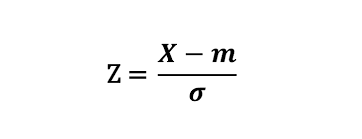
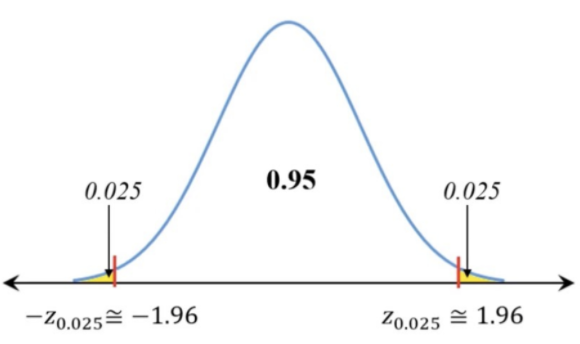
   
- **정규화**는 데이터의 범위를 0과 1로 변환하여 데이터의 분포를 조정하는 방법입니다. 예를 들어, A변수는 0-1000 까지의 값을, B변수는 0-10까지의 값을 갖는다고 할 때, 이 경우 상대적으로 큰 숫자 값을 갖는 A변수의 영향이 더 커집니다. 따라서 **숫자 데이터의 상대적 크기 차이를 제거**할 필요가 있습니다. normalization은 데이터의 scale을 통일하는 **rescaling**의 하나의 방법입니다.
- **모든 컬럼에 있는 데이터를 최소0, 최대1 사이의 비율 값으로 바꾸는 것**입니다. 데이터들을 각 컬럼의 최대값으로 나눴다고 생각하면 쉽습니다.
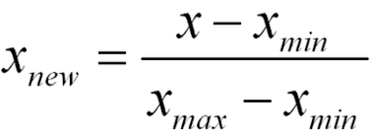

---

- 표준화를 통해 이상치를 제거한 뒤 정규화 작업을 하게 됩니다. 
- 이상치가 제거되지 않는 경우, 해당 이상치로 인해 나머지 값들은 0에 가까운 숫자로 왜곡되게 정규화될 가능성이 높게 됩니다. 

## 3.4.1 표준화

- 가장 기본적인 변환 방법은 곱셈과 변환만으로 변환하는 선형변환(linear transformation)으로, 변숫값의 범위를 변경하는 것입니다. 
- 선형변환을 통해 변수의 평균을 0, 표준편차를 1로 만드는 방법을 표준화라고 합니다. 
- 예를 들어 선형 회귀나 로지스틱 회귀 등의 선형 모델에서는 값의 범위가 큰 변수일수록 회귀계수(regression coefficient)가 작아지므로, 표준화하지 않으면 그러한 변수의 정규화(normalization)가 어려워집니다. 
   
- 신경망에서도 변수들 간의 값의 범위가 크게 차이나는 상태로는 학습이 잘 진행되지 않을 때가 많습니다. 또한 평균을 0에서 크게 벗어나지 않는 게 좋습니다. 
- 사이킷런 preprocessing 모듈의 StandardScaler클래스에서 표준화를 할 수 있습니다. 
- 각 변수의 평균값과 표준편차를 기준으로 표준화합니다. 

In [12]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:

# 설명용으로 학습 데이터와 테스트 데이터의 원래 상태를 복제해 두기
df_train_saved = df_train.copy()
df_test_saved = df_test.copy()

# 학습 데이터와 테스트 데이터를 반환하는 함수
def load_data():
    train_x, test_x = df_train_saved.copy(), df_test_saved.copy()
    return train_x, test_x

# 변환할 수치 변수를 목록에 저장
num_cols = [ 'Age', 'Fare']


In [15]:

# -----------------------------------
# 표준화
# -----------------------------------
# 데이터 읽어오기
train_x, test_x = load_data()
# -----------------------------------
from sklearn.preprocessing import StandardScaler

# 학습 데이터를 기반으로 복수 열의 표준화를 정의(평균 0, 표준편차 1)
scaler = StandardScaler()
scaler.fit(train_x[num_cols])

# 표준화를 수행한 후 각 열을 치환
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])


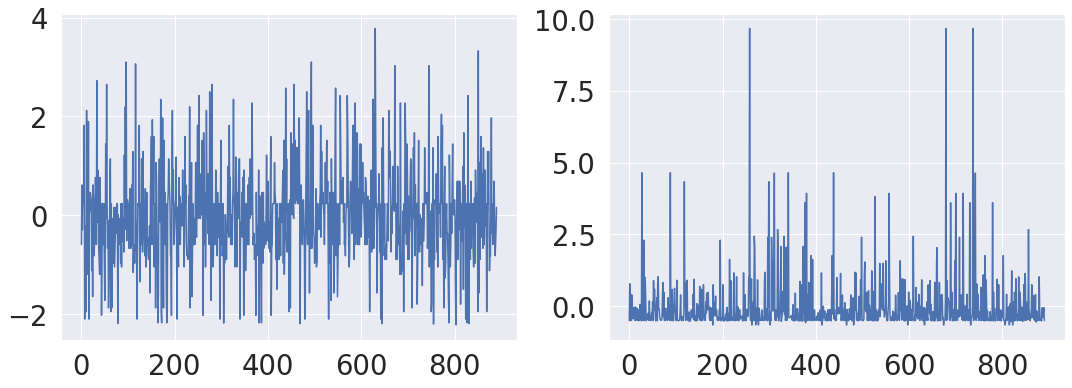

In [16]:
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes.flatten()

ax[0].plot(train_x['Age'])
ax[1].plot(train_x['Fare'])


In [17]:
#- 이상치 제거 
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    

In [18]:
outlier_iqr(train_x,'Fare')

IQR은 0.4649018732633316 이다.
lower bound 값은 -1.18650103391317 이다.
upper bound 값은 0.6731064591401562 이다.
총 이상치 개수는 116 이다.


In [19]:
outlier_iqr(train_x,'Age')

IQR은 1.0546878820773906 이다.
lower bound 값은 -2.17280331013025 이다.
upper bound 값은 2.045948218179313 이다.
총 이상치 개수는 40 이다.


In [20]:
train_x = train_x[(train_x['Fare'] < upper) & (train_x['Fare'] > lower)]
train_x = train_x[(train_x['Age'] < upper) & (train_x['Age'] > lower)]
len(train_x)

810

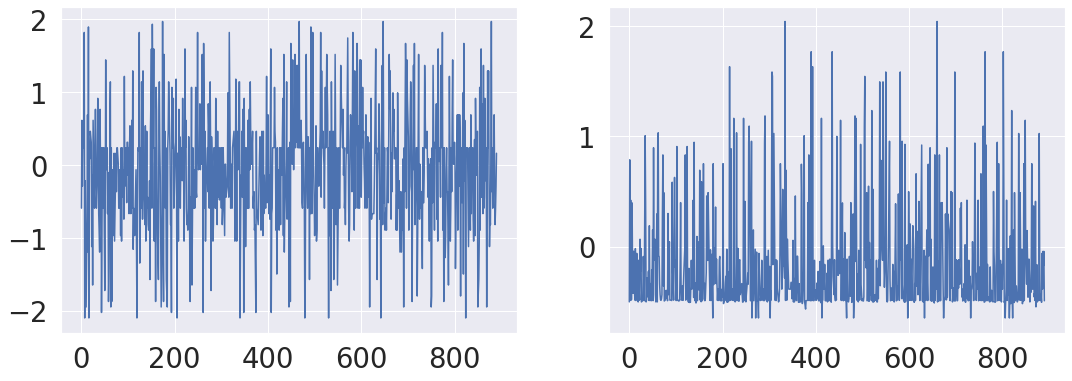

In [21]:
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes.flatten()

ax[0].plot(train_x['Age'] )
ax[1].plot(train_x['Fare'])


- 이처럼 클래스를 이용해 여러 개의 열을 한 번에 스케일링 할 수 있습니다. 학습 데이터에서 각 변수의 평균값과 표준편차를 fit 메서드로 계산하여 기억한 뒤 이를 통해 학습 데이터와 테스트 데이터를 변환합니다. 

- 0 또는 1의 두 값으로 나타나는 변수는 0과 1의 비율이 어느 한 쪽으로 치우치면 표준편차가 작으므로, 변환한 뒤에 0 또는 1 중에 어느 한 쪽의 절댓값이 커질 가능성이 있습니다. 이들 두 값을 갖는 이진변수에 대해서는 표준화를 실시하지 않아도 됩니다. 

데이터 전체의 값을 이용해 변환할 때 학습 데이터만 사용할까요? 테스트 데이터도 사용할까요?

- 표준화뿐만 아니라, 데이터 전체의 수치를 스케일링 등으로 변환할 때, 테스트 데이터를 이용할지 여부는 논란이 됩니다. 표준화의 경우엔 2가지 방법이 있습니다.
    1. 학습 데이터로 평균과 분산을 계산한 뒤 학습 데이터와 테스트 데이터를 변환
    2. 학습 데이터와 테스트 데이터를 결합하여 평균과 분산을 계산한 뒤 학습 데이터와 테스트 데이터를 변환
    
    

```python
#- 1.학습 데이터로 평균과 분산을 계산한 뒤 학습 데이터와 테스트 데이터를 변환


# -----------------------------------
# 표준화
# -----------------------------------
# 데이터 읽어오기
train_x, test_x = load_data()
# -----------------------------------
from sklearn.preprocessing import StandardScaler

# 학습 데이터를 기반으로 복수 열의 표준화를 정의(평균 0, 표준편차 1)
scaler = StandardScaler()
scaler.fit(train_x[num_cols])

# 표준화를 수행한 후 각 열을 치환
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])
```

```python
#-  2. 학습 데이터와 테스트 데이터를 결합하여 평균과 분산을 계산한 뒤 학습 데이터와 테스트 데이터를 변환


# -----------------------------------
# 데이터 읽어오기
train_x, test_x = load_data()
# -----------------------------------
from sklearn.preprocessing import StandardScaler

# 학습 데이터와 테스트 데이터를 결합한 결과를 기반으로 복수 열의 표준화를 정의
scaler = StandardScaler()
scaler.fit(pd.concat([train_x[num_cols], test_x[num_cols]]))

# 표준화 변환 후 데이터로 각 열을 치환
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])
```

- 실무에서는 모델을 만들 때 예측 대상 데이터가 당장 수중에 있는 경우가 적을 테니, 첫번째 방법을 사용하는 편이 좋습니다. 하지만 캐글 등의 경진대회에서는 처음부터 테스트 데이터가 준비된 경우가 많으므로, 두번쨰 방법으로 테스트 데이터의 정보를 적극적으로 활용할 수 있습니다. 

- 반면 테스트 데이터의 정보로 데이터를 가공하거나 모델을 구축하면 안된다는 주장도 있습니다. 이러한 주장은 특히 실무 관점에서 진지한 의견입니다. 이 관점에서 본다면 학습 데이터만을 기주으로 표준화를 수행해야 합니다. 다른 한편으로는 학습 데이터만을 기준을 변환할 경우 학습 데이터에 과하게 최적화되어 과적합으로 이어질 수 있다는 의견도 있습니다. 

- 이러한 의견들은 결국 관점의 차이에서 나옵니다. 학습 데이터와 테스트 데이터의 특징이 서로 지대한 차이가 나지 않는 한, 어느 데이터를 선택하든 큰 차이가 생기지는 않으므로 본인이 좋다고 판단한 방법을 사용하길 권합니다.

- 어쨋든 학습 데이터와 테스트 데이터는 같이 변환해야 합니다. 학습 데이터와 테스트 데이터에서 각각 다른 변환을 수행하는 일은 피해야 합니다. 

- 나쁜 예 ) 학습 데이터로 평균과 분산을 계산한 뒤 학습 데이터를 변환하고, 그와 별개로 테스트 데이터로 평균과 분산을 계산한 뒤 테스트 데이터를 변환하는 방법


```python
#- 3. 나쁜 예

# -----------------------------------
# 데이터 읽어오기
train_x, test_x = load_data()
# -----------------------------------
from sklearn.preprocessing import StandardScaler

# 학습 데이터와 테스트 데이터를 각각 표준화(나쁜 예)
scaler_train = StandardScaler()
scaler_train.fit(train_x[num_cols])
train_x[num_cols] = scaler_train.transform(train_x[num_cols])

scaler_test = StandardScaler()
scaler_test.fit(test_x[num_cols])
test_x[num_cols] = scaler_test.transform(test_x[num_cols])
```

## 3.4.2 최소-최대 스케일링
- 변숫값의 범위를 다루는 또 하나의 방법은 변숫값이 취하는 범위를 특정 구간(보통 0~1사이구간)으로 변환하는 최소-최대 스케일링 방법 입니다. 
- 파이썬에서는 사이킷런의 MinMaxScaler클래스를 이용합니다. 


In [22]:
from sklearn.preprocessing import MinMaxScaler

# 학습 데이터를 기반으로 여러 열의 최소-최대 스케일링 정의
scaler = MinMaxScaler()
scaler.fit(train_x[num_cols])

# 정규화(0~1) 변환 후의 데이터로 각 열을 치환
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])


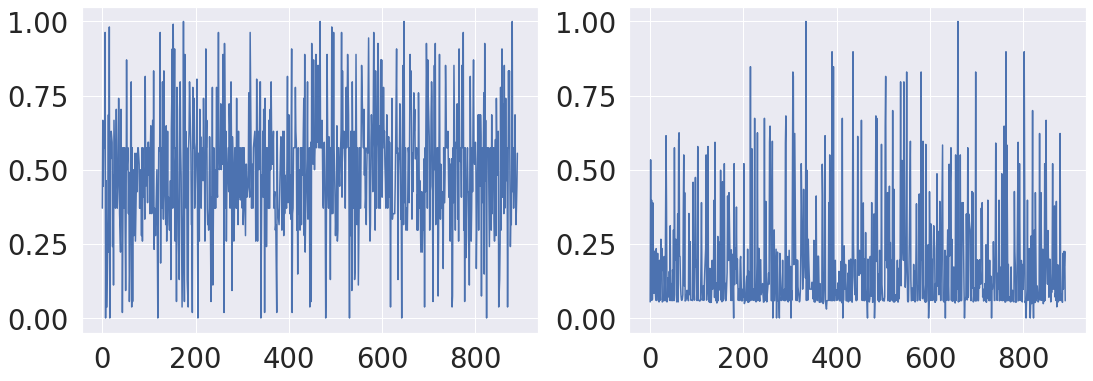

In [23]:
fig, axes = plt.subplots(1,2,figsize=(18,6))
ax = axes.flatten()

ax[0].plot(train_x['Age'] )
ax[1].plot(train_x['Fare'])

- 다만 변환 후의 평균이 정확히 0이 되지 않고 이상치의 악영향을 받기 더 쉽다는 단점이 있으므로 표준화 방법이 더 자주 쓰입니다.
- 한편 이미지 데이터의 각 픽셀값 등은 처음부터 0~255 로 범위가 정해진 변수이므로 최소-최대 스케일링을 이용하는게 더 자연스러울 수 있습니다. 